# LAB 1: Gradient Descent and Stuff
### AI and Machine Learning // Suchkova Natalia М8О - 114М - 22
30.09.2022 @ MAI IT-Center

<a id='g66'></a>

## Table of Contents

1. [**Chosen Functions' Formulas**](#g5)


2. [**Functions' Visualization**](#g4)

    -[Himmelblau Function](#g4)
    
    -[Rastrigin Function](#g3)
    
    -[Rosenbrock Function](#g2)


3. [**Classical Gradient Descent**](#g1)

    -[For Himmelblau](#g6)
    
    -[For Rastrigin](#g7)
    
    -[For Rosenbrock](#g8)
    
    
4. [**Classical GD with Data Blobs**](#g10)
    
    -[Loss Function & Data Generation](#g10)


4. [**Сlassical Stochastic Gradient Descent**](#g9)
    
    -[SGD Method Code](#g11)
    
    -[SGD w/ Data Blobs](#g90)
    

5. [**SGD with lr_scheduler**](#g12)

    -[Himmelblau + lr_sched](#g61)
    
    -[Rastrigin + lr_sched](#g71)
    
    -[Rosenbrock + lr_sched](#g81)
    
    -[GD + lr_sched w/ Data Blobs](#g91)
  
    
6. [**Momentum**](#g13)

    -[Himmelblau + GD momentum](#g62)
    
    -[Rastrigin + GD momentum](#g72)
    
    -[Rosenbrock + GD momentum](#g82)
    
    -[GD + momentum w/ Data Blobs](#g92)


7. [**Adaptive**](#g14)


In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from typing import Tuple, Mapping
from sklearn.datasets import make_blobs

from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D

<a id='g5'></a>

## Real Functions Formulas & Visualization

**Функция Химмельблау**	$f(x,y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2 $ - попроще

**Функция Розенброка**	$f(x) = \displaystyle\sum_{i=1}^{n-1} \big\lbrack 100(x_{i+1} - x_i^2)^2 +(x_i - 1)^2 \big\rbrack$  - посложнее

**Функция Растригина** $f(x) = An + \displaystyle\sum_{i=1}^{n} \big\lbrack  x_i^2 - Acos(2pix_i) \big\rbrack$, where $A = 10$


In [2]:
class Himmelblau:
    
    def function(x: np.ndarray) -> np.float64:
        return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2
    
    def gradient(x: np.ndarray) -> np.array:
        return np.array([4 * x[0] * (x[0]**2 + x[1] - 11) \
                         + 2 * (x[0] + x[1]**2 - 7),
                         2 * (x[0]**2 + x[1] - 11) \
                         + 4 * x[1] * (x[0] + x[1]**2 - 7)])

class Rosenbrock: 
    
    def function(x: np.ndarray, b: int = 100) -> np.float64:
        return b * (x[1] - x[0]**2)**2 + (x[0] - 1)**2

    def gradient(x: np.ndarray, b: int = 100) -> np.array:

        return np.array([2 * (x[0] - 1) \
                         - 4 * b * x[0] * (x[1] - x[0]**2),
                         2 * b * (x[1] - x[0]**2)])
    
class Rastrigin:
    
    def function(x: np.ndarray, A: int = 10) -> np.float64:
        return list(x**2 - A * np.cos(2 * np.pi * x))[0] # + A
    
    def gradient(x: np.float32, A: int = 10) -> np.float64:
            return 2 * x + A * 2 * np.pi * np.sin(2 * np.pi * x)

<a id='g4'></a>

# Visualize

## Himmelblau Function

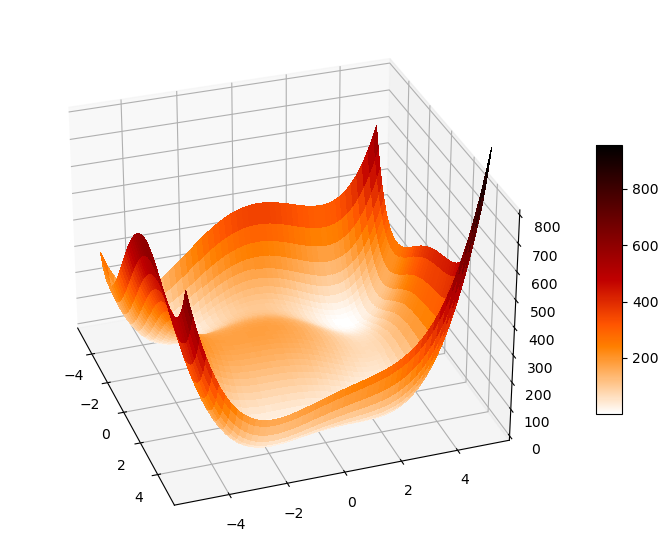

In [3]:
X = np.linspace(-5.12, 5.12, 100)
Y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(X, Y) 

Z = Himmelblau.function(np.array([X, Y]))

figRos = plt.figure(figsize=(12, 7))
axRos = plt.axes(projection='3d')
axRos.view_init(elev=30., azim=-19)

surf = axRos.plot_surface(X, Y, Z, cmap=cm.gist_heat_r,
                       linewidth=0, antialiased=False)
axRos.set_zlim(0, 800)
figRos.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

<a id='g3'></a>

## Rastrigin Function

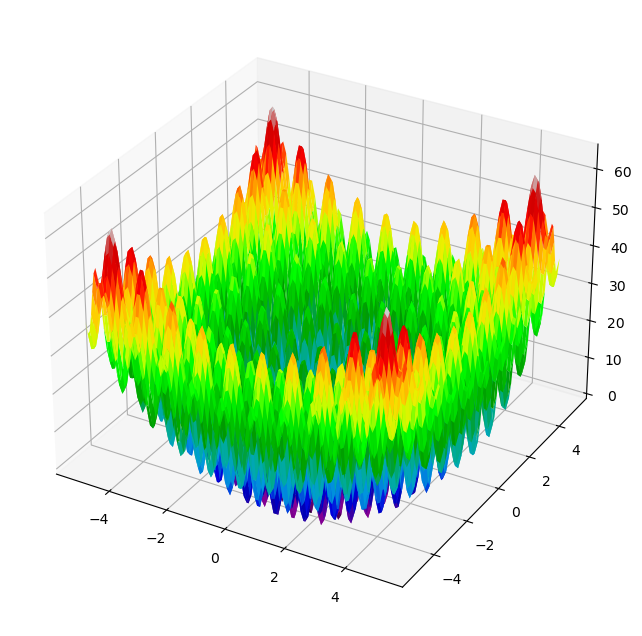

In [4]:
X = np.linspace(-5.12, 5.12, 100)     
Y = np.linspace(-5.12, 5.12, 100)     
X, Y = np.meshgrid(X, Y) 

Z = (X**2 - 10 * np.cos(2 * np.pi * X)) + \
  (Y**2 - 10 * np.cos(2 * np.pi * Y))

fig = plt.figure(figsize=(12,8)) 
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
  cmap=cm.nipy_spectral, linewidth=0.08,
  antialiased=True)    
ax.set_zlim(0, 65)
# plt.savefig('rastrigin_graph.png')
plt.show()

<a id='g2'></a>

## Rosenbrock Function

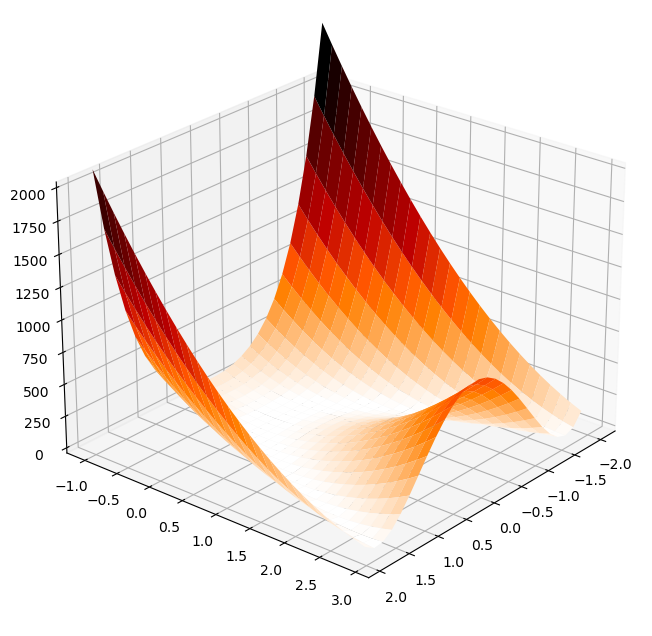

In [504]:
X = np.arange(-2, 2, 0.15)
Y = np.arange(-1, 3, 0.15)
X, Y = np.meshgrid(X, Y)

Z = Rosenbrock.function(np.array([X, Y]))

fig = plt.figure(figsize=(12,8)) 
ax = plt.axes(projection='3d') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap=cm.gist_heat_r, linewidth=0.08,
                antialiased=True)    
ax.set_zlim(0, 2000)
ax.view_init(elev=25., azim=40)
# plt.savefig('rosenbrock_graph.png')
plt.show()

<a id='g1'></a>

## My Classic Gradient Descent Function

In [541]:
def classic_GD (function: Mapping, gradient_of_function: Mapping,
                start: np.ndarray, x_data = False, y_labels = False, 
                learning_rate: float = 0.01, n_iter: int = 100, 
                tolerance: float = 1e-5) -> Tuple [np.ndarray, np.float32]:
    
    """ I' ll put documentation here later
    а еще я сделаю хотя бы одну визуализацию динамики loss для сгд
    сделаю визуализацию движения точки при поиске минимума
    может быть: могу добавить датасет, который будет собирать все показания и при каждом запуске 
    того или иного метода""" 
    
    if n_iter <= 0 or learning_rate <= 0:
        raise ValueError("'n_iter' and 'learning_rate' must be greater than zero")
        
    current_point = start.copy()
    current_point = current_point.astype('float64')
    
    for iter in range(n_iter):
        
        if type(x_data) == bool: # for functions
            diff = learning_rate * -gradient_of_function(current_point)
            
            if np.all(np.abs(diff) <= tolerance):
                break
                
            current_point += diff
            
        else:  # for data
            current_point += learning_rate * gradient_of_function(current_point, x_data, y_labels)
        
    if type(x_data) == bool:
         return current_point, function(current_point), \
            f'Minimum point coordinates {current_point}, \
    with function value = {round(function(current_point), 4)}'
    else:
        return current_point, function(current_point, x_data, y_labels), \
            f'Minimum point coordinates {current_point},', \
            f'with loss function value = {function(current_point, x_data, y_labels)}'

Тест: Функция сферы $f(x) = \displaystyle\sum_{i=1}^{n} x_i^2$

In [542]:
def test_funk_1(x: np.ndarray) -> np.float64:
    return np.sum(np.square(x))

def test_f1_grad(x: np.ndarray) -> np.float64:
    return 2 * x

In [543]:
test_funk_1(np.array([2,2]))

8

In [544]:
test_f1_grad(np.array([2,2]))

array([4, 4])

In [545]:
classic_GD(test_funk_1, test_f1_grad, np.array([100, 100]), learning_rate=0.001, n_iter=4500)

(array([0.01223026, 0.01223026]),
 0.0002991586618959827,
 'Minimum point coordinates [0.01223026 0.01223026],     with function value = 0.0003')

<a id='g6'></a>

### Himmelblau

In [391]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/3b6d888196974f862467cfe02748f3ae2ffdf476")

In [546]:
classic_GD(Himmelblau.function, Himmelblau.gradient, np.array([-100, -100]), learning_rate=0.00001, n_iter=9500)

(array([-3.78824381, -3.29729647]),
 0.009904283078337368,
 'Minimum point coordinates [-3.78824381 -3.29729647],     with function value = 0.0099')

Видим, что на функции Химмельблау обычный градиентный спуск вполне себе хорошо справляется с задачей минимизации.

<a id='g7'></a>

### Rastrigin

In [393]:
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/0ef36b9a7230888e739f302e1a5d67e36c152de8")

In [463]:
%%time
classic_GD(Rastrigin.function, Rastrigin.gradient, np.array([100, 100]), learning_rate=0.1, n_iter=9000)

Wall time: 200 ms


(array([0.76548588, 0.76548588]),
 -0.38550352303418045,
 'Minimum point coordinates [0.76548588 0.76548588],     with function value = -0.3855')

Работает, но хуже. Ему тяжело не потеряться в минимумах, и в зависимости от количества итераций очень сильно скачет значение функции, так как на самой фукнции имеются близко расположенные высокие "бугры".

<a id='g8'></a>

### Rosenbrock

In [395]:
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/53f008f82897059e3591d0a9a0aa27b60a1745b4")

In [396]:
Rosenbrock.gradient(np.array([2,2]))

array([1602, -400])

In [547]:
%%time
classic_GD(Rosenbrock.function, Rosenbrock.gradient, np.array([10, 10]), 
           tolerance = 1e-7, learning_rate=0.00001, n_iter=200000)

Wall time: 2.42 s


(array([3.02969959, 9.18234049]),
 4.120743764485798,
 'Minimum point coordinates [3.02969959 9.18234049],     with function value = 4.1207')

С Розенброком ему тоже сложно. Не отлично, но и не ужасно, кстати, для самого простого метода. Тут приходится менять tolerance, так как нам нужен низкий lr, чтобы точнее попасть в эту узкую полосу минимумов. Из-за очень маленького lr приходится увеличивать количество шагов, чтобы он хоть куда-то ушел. Лучше всего конечно помогает приближать стартовую точку к минимуму. Иначе у питона переполняется вообще память и он падает с 'overflow encounteres in double_scalars'

<a id='g10'></a>

## GD with Random Data Blobs

Возьмем MSE как функцию потерь.

In [398]:
def MSE_loss(opt: np.ndarray, x: np.ndarray, y: np.ndarray) -> np.float64:
    loss = np.zeros(opt.shape, dtype = np.float64)
    for i in range(len(x)):
        loss[y[i]] += (x[i] - opt[y[i]])**2
    return loss / len(x)

def loss_grad(opt: np.ndarray, x: np.ndarray, y: np.ndarray) -> np.float64:
    loss = np.zeros(opt.shape, dtype = np.float64)
    for i in range(len(x)):
        loss[y[i]] += 2 * (x[i] - opt[y[i]])
    return loss / len (x)

Генерим данные.

In [5]:
X, y = make_blobs(n_samples=1000, centers= [[3, 1], [-2, -5], [9, -12]], n_features=3,
                  random_state=12)
print(X.shape)
print(len(X), len(y))

start_point = np.array([[5, 1], [-4, 13], [0, 0]])

(1000, 2)
1000 1000


В качестве задачи для минимизации мы зададим нахождение центра кластера по расстоянию от всех точек кластера. Можно сделать для любого количества кластеров. Сделаем для 3х.

In [594]:
x_plot = X.T # transpose data for plotting data [[x0, y0], [x1, y1].... ] - > [plt.scatter(Xs, Ys)]
start_plot = start_point.T

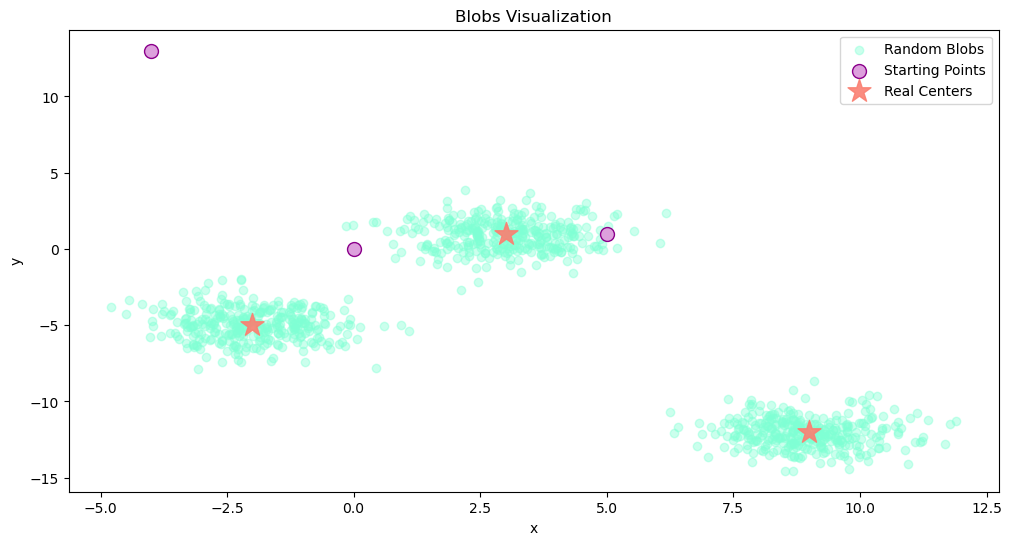

In [595]:
centers_transposed= [[3, -2, 9], [1, -5, -12]]
plt.figure(figsize=(12,6))
plt.scatter(x_plot[0], x_plot[1], c='aquamarine', alpha=0.4)
plt.scatter(start_plot[0], start_plot[1], c='plum', 
            edgecolors='darkmagenta', s=100)
plt.scatter(centers_transposed[0], centers_transposed[1], 
            c='salmon', marker='*', s=300, alpha=0.9)
plt.title('Blobs Visualization')
plt.legend(['Random Blobs', 'Starting Points', 'Real Centers'])
plt.xlabel('x')
plt.ylabel('y')
# plt.text(
#     3.2,
#     5,
#     "Size of marker = p" "Color of marker = content",
# )
plt.show()

In [596]:
%%time
GD_wblob = classic_GD(MSE_loss, loss_grad, start_point, x_data=X, y_labels=y, learning_rate=0.1, n_iter=50)
GD_wblob

Wall time: 181 ms


(array([[  3.05139137,   0.91250377],
        [ -2.07430559,  -4.39639835],
        [  8.63129005, -11.65991767]]),
 array([[0.35849297, 0.32751488],
        [0.33086808, 0.45698296],
        [0.3506974 , 0.34995178]]),
 'Minimum point coordinates [[  3.05139137   0.91250377]\n [ -2.07430559  -4.39639835]\n [  8.63129005 -11.65991767]],',
 'with loss function value = [[0.35849297 0.32751488]\n [0.33086808 0.45698296]\n [0.3506974  0.34995178]]')

Классический градиентный спуск хорошо справляется на таких данных. И достаточно быстро.

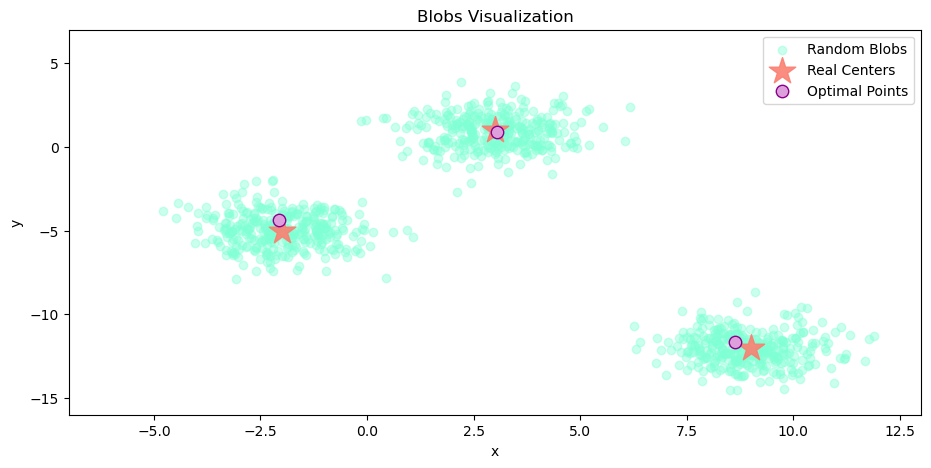

In [605]:
plt.figure(figsize=(11,5))
plt.scatter(x_plot[0], x_plot[1], c='aquamarine', alpha=0.4)
plt.scatter(centers_transposed[0], centers_transposed[1],
            c='salmon', marker='*', s=400, alpha=0.9)
plt.scatter(GD_wblob[0].T[0], GD_wblob[0].T[1], 
            c='plum', edgecolors='darkmagenta', s=80)
plt.title('Blobs Visualization')
plt.legend(['Random Blobs', 'Real Centers', 'Optimums Found'])
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-7, 13, -16, 7])
plt.show()

<a id='g9'></a>

## Stochastic Gradient Descent

<a id='g11'></a>

In [4]:
def SGD(
        function: Mapping, gradient: Mapping, 
        start: np.ndarray, x = False, y = False,
        n_iter: int = 100, learning_rate: float = 0.01, 
        batch_size: int = 10, tolerance=1e-06, 
        dtype="float64", rand_state: int = 12
        ) -> Tuple [np.ndarray, np.ndarray]:
 
    dtype_ = np.dtype(dtype)
    
    if n_iter <= 0 or learning_rate <= 0:
        raise ValueError("'n_iter' and learning rate \
                         must be greater than zero")
   
#     idx = 0
#     while idx < len(x):
#         new = function(x[idx][0], x[idx][1])
#         x[idx][1] = new
#         idx += 1
    
#     for dot in x: # don't need this one
#         y = function(dot[0], dot[1])
        
    cur_point = start.copy()
    cur_point = cur_point.astype('float64')
    
    rng = np.random.default_rng(seed=rand_state)
    
    if type(x) != bool:
        n_obs = x.shape[0]
        if n_obs != y.shape[0]:
            raise ValueError("'x' and 'y' lengths do not match")
        
        xy = np.c_[x.reshape(n_obs, -1), y.T]

    for _ in range(n_iter): # gradient descent loop
        
        if type(x) != bool:
            rng.shuffle(xy)
            diff = np.zeros(cur_point.shape, dtype=dtype_)
            
            if not 0 < batch_size <= n_obs:
                raise ValueError( "'batch_size' must be > 0 and <= \
                                    than the number of observations")
                    
            for start in range(0, n_obs, batch_size): # batch moves
                stop = start + batch_size
                y_cut = xy[start:stop, -1:].astype('int')
                diff += learning_rate * gradient(cur_point, xy[start:stop, :-1], y_cut) # -=  -grad = +

                if np.all(np.abs(diff) <= tolerance):
                    break
                cur_point += diff

        else:                                           # it's literally same classical GD
            diff = learning_rate * -gradient(cur_point)
            if np.all(np.abs(diff) <= tolerance):
                break
            cur_point += diff
                
    return [cur_point, function(cur_point, x, y)] if type(x) != bool else [cur_point, function(cur_point)]

In [ ]:
SGD(test_funk_1, test_f1_grad, np.array([100, 100]),
    x = False, y = False, n_iter=440, learning_rate=0.01)

In [574]:
# import warnings
# warnings.filterwarnings('ignore')

In [575]:
%%time
SGD(test_funk_1, test_f1_grad, np.array([100, 100]),
    x = False, y = False, n_iter=440, learning_rate=0.01)

Wall time: 6.98 ms


[array([0.01378711, 0.01378711]), 0.0003801689165099048]

In [577]:
SGD(Himmelblau.function, Himmelblau.gradient, np.array([100, 100]), learning_rate=0.00001, n_iter=10000)

[array([2.97914294, 2.04887732]), 0.03709377856430426]

In [578]:
SGD(Rastrigin.function, Rastrigin.gradient, np.array([100, 100]), learning_rate=0.1, n_iter=9000)

[array([0.76548588, 0.76548588]), -0.38550352303418045]

Да, проверили, все правильно. Тут наш обычный СГД для фукнций это тот же самый обычный ГД.

<a id='g90'></a>

### SGD w/ Data Blobs

In [636]:
%%time
SGD_wblob = SGD(MSE_loss, loss_grad, start_point, x=X, y=y,
        n_iter=20, learning_rate=0.001, 
        batch_size=20)
SGD_wblob

Wall time: 212 ms


[array([[  2.98583043,   0.92860764],
        [ -2.00778993,  -4.94839501],
        [  8.91755648, -12.06771327]]),
 array([[0.35715016, 0.32763214],
        [0.32953309, 0.34791213],
        [0.32381401, 0.30108055]])]

Работает хорошо и быстро.

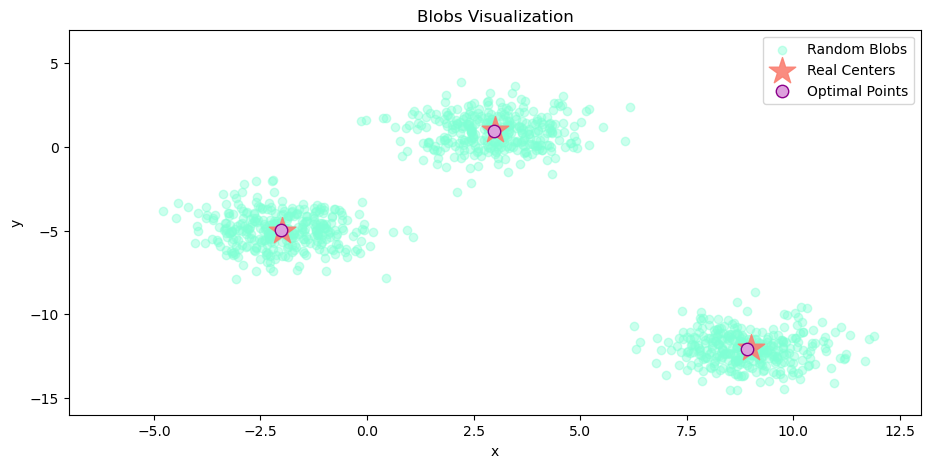

In [637]:
plt.figure(figsize=(11,5))
plt.scatter(x_plot[0], x_plot[1], c='aquamarine', alpha=0.4)
plt.scatter(centers_transposed[0], centers_transposed[1], c='salmon', marker='*', s=400, alpha=0.9)
plt.scatter(SGD_wblob[0].T[0], SGD_wblob[0].T[1], c='plum', edgecolors='darkmagenta', s=80)
plt.title('Blobs Visualization')
plt.legend(['Random Blobs', 'Real Centers', 'Optimums Found'])
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-7, 13, -16, 7])
plt.show()

<a id='g12'></a>

## SGD with lr_scheduler

In [793]:
def SGD_sched(
            function: Mapping, gradient: Mapping, start: np.ndarray,
            x = False, y = False, schedule_lr: np.float64 = 0.6,
            n_iter: int = 100, learning_rate: float = 0.01, 
            batch_size: int = 10, tolerance=1e-06, 
            dtype="float64", rand_state: int = 12
            ) -> Tuple [np.ndarray, np.ndarray]:

    dtype_ = np.dtype(dtype)
    
    if n_iter <= 0 or learning_rate <= 0:
        raise ValueError("'n_iter' and learning rate \
                         must be greater than zero")

        
    cur_point = start.copy()
    cur_point = cur_point.astype('float64')
    
    rng = np.random.default_rng(seed=rand_state)

    if type(x) != bool:
        n_obs = x.shape[0]
        if n_obs != y.shape[0]:
            raise ValueError("'x' and 'y' lengths do not match")
        
        xy = np.c_[x.reshape(n_obs, -1), y.T]

        x = x.reshape(n_obs, -1)
        y = y.T

    for _ in range(n_iter): # gradient descent loop
        
        if type(x) != bool:
            rng.shuffle(xy)
            diff = np.zeros(cur_point.shape, dtype=dtype_)
            
            if not 0 < batch_size <= n_obs:
                raise ValueError( "'batch_size' must be > 0 and <= \
                                    than the number of observations")
                    
            for start in range(0, n_obs, batch_size): # batch moves
                stop = start + batch_size
                y_cut = xy[start:stop, -1:].astype('int')
                
                if _ <= 1: # from second iteration we start to slow down
                    diff -= learning_rate * -gradient(cur_point, xy[start:stop, :-1], y_cut)
                else:
                    diff -= learning_rate * schedule_lr * -gradient(cur_point, xy[start:stop, :-1], y_cut)

                if np.all(np.abs(diff) <= tolerance):
                    break
                    
                cur_point += diff
        
        else:
            if _ < 1:
                diff = learning_rate * -gradient(cur_point)
            else:
                diff = learning_rate * schedule_lr * -gradient(cur_point)
                
            if np.all(np.abs(diff) <= tolerance):
                break

            cur_point += diff
                
    return [cur_point, function(cur_point, x, y)] if type(x) != bool else [cur_point, function(cur_point)]

In [794]:
SGD_sched(test_funk_1, test_f1_grad, np.array([100, 100]),
        x = False, y = False,
        n_iter=40, learning_rate=0.1)

[array([0.54690791, 0.54690791]), 0.5982165134928504]

<a id='g61'></a>

### Himmelblau GD + lr_sched

In [795]:
SGD_sched(Himmelblau.function, Himmelblau.gradient, np.array([-100, -100]), learning_rate=0.00001, n_iter=15500)

[array([-3.78079975, -3.28557515]), 0.00028046745547195796]

<a id='g71'></a>

### Rastrigin GD + lr_sched

In [819]:
%%time
SGD_sched(Rastrigin.function, Rastrigin.gradient, np.array([100, 100]), 
          schedule_lr=0.4, learning_rate=0.1, n_iter=1000000)

Wall time: 52.2 s


[array([-1.20213891, -1.20213891]), -1.5169429723168488]

<a id='g81'></a>

### Rosenbrock GD + lr_sched

In [883]:
%%time
SGD_sched(Rosenbrock.function, Rosenbrock.gradient, np.array([20, 10]), 
           schedule_lr=0.4, tolerance = 1e-8, learning_rate=0.000001, n_iter=6000)

Wall time: 136 ms


[array([ 3.29911992, 10.88759846]), 5.28711263476187]

<a id='g91'></a>

### GD + lr_sched w/ Data

In [881]:
%%time
GD_sched_blob = SGD_sched(MSE_loss, loss_grad, start_point, x=X, y=y,
                          n_iter=500, learning_rate=0.001, 
                          schedule_lr=0.8, batch_size=60)
GD_sched_blob

Wall time: 22.6 s


[array([[  2.98887053,   0.91686709],
        [ -2.01197739,  -4.9658316 ],
        [  8.9089915 , -12.03534863]]),
 array([[0.35714895, 0.32752954],
        [0.32953022, 0.34777313],
        [0.32382631, 0.30091303]])]

Работают с примерно одинаковой скоростью, иногда scheduler ускоряет работу. Но во-первых, сгд и сгд с щедюлером нужно намного меньше итераций, чтобы найти минимум, во-вторых, сгд с щедьюлером дает чуть более точные результаты.

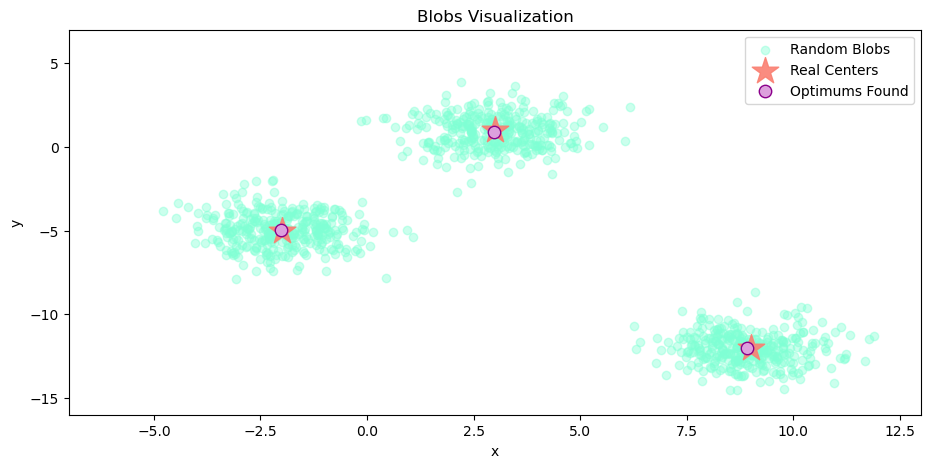

In [884]:
plt.figure(figsize=(11,5))
plt.scatter(x_plot[0], x_plot[1], c='aquamarine', alpha=0.4)
plt.scatter(centers_transposed[0], centers_transposed[1], 
            c='salmon', marker='*', s=400, alpha=0.9)
plt.scatter(GD_sched_blob[0].T[0], GD_sched_blob[0].T[1], 
            c='plum', edgecolors='darkmagenta', s=80)
plt.title('Blobs Visualization')
plt.legend(['Random Blobs', 'Real Centers', 'Optimums Found'])
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-7, 13, -16, 7])
plt.show()

<a id='g13'></a>

## Momentum Method
sgd with momentum

In [885]:
def SGD_momentum(
                function: Mapping, gradient: Mapping, start: np.ndarray,
                x = False, y = False, momentum: np.float64 = 0.1,
                n_iter: int = 100, learning_rate: float = 0.01, 
                batch_size: int = 10, tolerance=1e-06, 
                dtype="float64", rand_state: int = 12
                ) -> Tuple [np.ndarray, np.ndarray]:
 
    dtype_ = np.dtype(dtype)
    
    if n_iter <= 0 or learning_rate <= 0:
        raise ValueError("'n_iter' and learning rate \
                         must be greater than zero")
        
    cur_point = start.copy()
    cur_point = cur_point.astype('float64')
    
    rng = np.random.default_rng(seed=rand_state)

    if type(x) != bool:
        n_obs = x.shape[0]
        
        if n_obs != y.shape[0]:
            raise ValueError("'x' and 'y' lengths do not match")
            
        xy = np.c_[x.reshape(n_obs, -1), y.T]
    
    diff_cum = np.zeros(cur_point.shape, dtype=dtype_)  # cumulative to use previous difference

    for _ in range(n_iter): # gradient descent loop
        
        if type(x) != bool:
            rng.shuffle(xy)
            diff = np.zeros(cur_point.shape, dtype=dtype_)
            
            if not 0 < batch_size <= n_obs:
                raise ValueError( "'batch_size' must be > 0 and <= \
                                    than the number of observations")
                    
            for start in range(0, n_obs, batch_size): # batch moves
                stop = start + batch_size
                y_cut = xy[start:stop, -1:].astype('int')
                diff -= learning_rate * -gradient(cur_point, xy[start:stop, :-1], y_cut)
                diff_cum = momentum * diff_cum - diff

                if np.all(np.abs(diff) <= tolerance):
                    break
                    
                cur_point -= diff_cum
        
        else:
            diff = learning_rate * -gradient(cur_point)
            diff_cum = momentum * diff_cum - diff
            
            if np.all(np.abs(diff) <= tolerance):
                break
                
            cur_point -= diff_cum
                
    return [cur_point, function(cur_point, x, y)] if type(x) != bool else [cur_point, function(cur_point)]

In [886]:
SGD_momentum(test_funk_1, test_f1_grad, np.array([100, 100]),
            x = False, y = False, momentum=0.6,
            n_iter=50, learning_rate=0.1)

[array([-0.00029313, -0.00029313]), 1.7185343174561965e-07]

Результаты (точность и скорость) еще улучщаются!!

<a id='g62'></a>

### Himmelblau GD + momentum

In [887]:
%%time
SGD_momentum(Himmelblau.function, Himmelblau.gradient, np.array([-100, -100]), 
             momentum=0.6, learning_rate=0.00001, n_iter=15500)

Wall time: 259 ms


[array([2.99838501, 2.0038804 ]), 0.0002275333004954788]

<a id='g72'></a>

### Rastrigin GD + momentum

In [888]:
%%time
SGD_momentum(Rastrigin.function, Rastrigin.gradient, np.array([100, 100]), 
              momentum=0.5, learning_rate=0.01, n_iter=200000)

Wall time: 11.5 s


[array([1.82116215, 1.82116215]), -1.0071176603086047]

Намного лучше!!

<a id='g82'></a>

### Rosenbrock GD + momentum

In [891]:
%%time
SGD_momentum(Rosenbrock.function, Rosenbrock.gradient, np.array([10, 10]),
              momentum=0.8, tolerance = 1e-12, learning_rate=0.00001, n_iter=5000000)

Wall time: 51.6 s


[array([0.99999988, 0.99999975]), 1.563697486717025e-14]

Самый лучший результат из всех, которые мы получали. Но и самый затратный по времени.

<a id='g92'></a>

### GD + momentum w/ Data Blobs

In [892]:
%%time
GD_mom_blob = SGD_momentum(MSE_loss, loss_grad, start_point, 
                           x=X, y=y, n_iter=300, learning_rate=0.001, 
                           momentum=0.8, batch_size=100)
GD_mom_blob

Wall time: 13.4 s


[array([[  2.98391581,   0.90914984],
        [ -2.00223893,  -4.96838493],
        [  8.92637319, -12.0513797 ]]),
 array([[0.3571541 , 0.32751226],
        [0.3295549 , 0.34776977],
        [0.32385238, 0.30090881]])]

По времени не ускоряет, работает даже чуть медленнее, чем обычный сгд и требует настройки гиперпараметров - без подбора дает результаты хуже обычного сгд. Больше батч - лучше, меньше моментум - тоже лучше, значит он нам мешает. Много итераций не нужно.

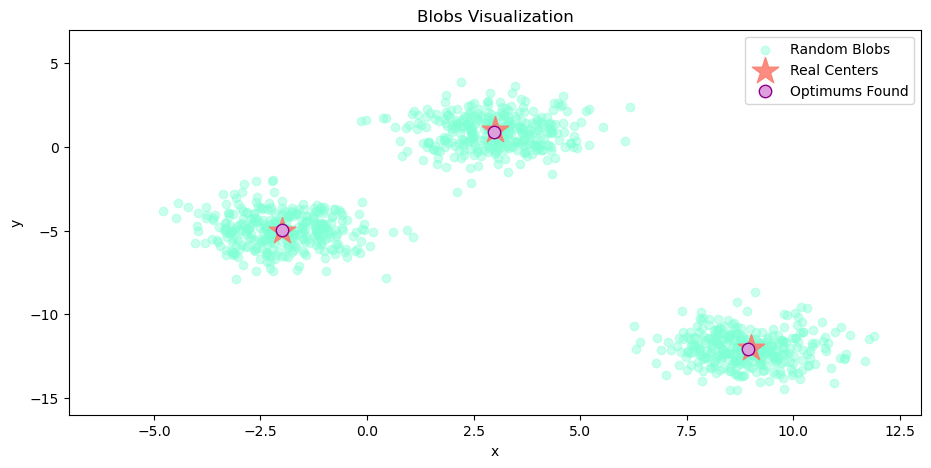

In [893]:
plt.figure(figsize=(11,5))
plt.scatter(x_plot[0], x_plot[1], c='aquamarine', alpha=0.4)
plt.scatter(centers_transposed[0], centers_transposed[1], 
            c='salmon', marker='*', s=400, alpha=0.9)
plt.scatter(GD_mom_blob[0].T[0], GD_mom_blob[0].T[1], 
            c='plum', edgecolors='darkmagenta', s=80)
plt.title('Blobs Visualization')
plt.legend(['Random Blobs', 'Real Centers', 'Optimums Found'])
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-7, 13, -16, 7])
plt.show()

<a id='g14'></a>

## AdaGrad (Adaptive)

In [1079]:
def GD_AdaGrad(
            function: Mapping, gradient: Mapping, start: np.ndarray,
            x = False, y = False, gamma: np.float64 = 0.1,
            n_iter: int = 100, learning_rate: float = 0.01, 
            batch_size: int = 10, tolerance=1e-06, 
            dtype="float64", rand_state: int = 12
            ) -> Tuple [np.ndarray, np.ndarray]:

    dtype_ = np.dtype(dtype)

    if n_iter <= 0 or learning_rate <= 0:
        raise ValueError("'n_iter' and learning rate \
                         must be greater than zero")

    cur_point = start.copy()
    cur_point = cur_point.astype('float64')

    rng = np.random.default_rng(seed=rand_state)

    if type(x) != bool:
        n_obs = x.shape[0]

        if n_obs != y.shape[0]:
            raise ValueError("'x' and 'y' lengths do not match")

        xy = np.c_[x.reshape(n_obs, -1), y.T]

    G = np.zeros(cur_point.shape, dtype=dtype_) 

    for _ in range(n_iter): # gradient descent loop
        loss = np.zeros(cur_point.shape, dtype=dtype_)
        
        if type(x) != bool:
            rng.shuffle(xy)
            
            
            if not 0 < batch_size <= n_obs:
                raise ValueError( "'batch_size' must be > 0 and <= \
                                    than the number of observations")

            for start in range(0, n_obs, batch_size): # batch moves
                stop = start + batch_size
                y_cut = xy[start:stop, -1:].astype('int')
#                 loss -= learning_rate * -gradient(cur_point, xy[start:stop, :-1], y_cut)
                loss += gradient(cur_point, xy[start:stop, :-1], y_cut)
                G = gamma * G + loss ** 2
                
                if np.all(np.abs(loss) <= tolerance):
                    break

                cur_point += (loss/np.sqrt(G)) * learning_rate

        else:
            loss += gradient(cur_point)
            G = gamma * G + loss ** 2

            if np.all(np.abs(loss) <= tolerance):
                break

            cur_point -= (loss/np.sqrt(G)) * learning_rate

    return [cur_point, function(cur_point, x, y)] if type(x) != bool else [cur_point, function(cur_point)]

In [1086]:
%%time
GD_AdaGrad(test_funk_1, test_f1_grad, np.array([100, 100]),
           x = False, y = False, gamma=0.1, 
           n_iter=50000, learning_rate=0.01)

Wall time: 2.86 s


[array([0.00474342, 0.00474342]), 4.499999999999995e-05]

Результаты (точность и скорость) еще улучшаются!!

<a id='g63'></a>

### Himmelblau + AdaGrad

In [1087]:
%%time
GD_AdaGrad(Himmelblau.function, Himmelblau.gradient, np.array([100, 100]), 
           gamma=0.8, learning_rate=0.01, n_iter=50000)

Wall time: 3.91 s


[array([3.00223411, 2.00223281]), 0.00036946294415207096]

<a id='g73'></a>

### Rastrigin + AdaGrad

In [1123]:
%%time
GD_AdaGrad(Rastrigin.function, Rastrigin.gradient, np.array([-10, 100]), 
           tolerance=1e-09, gamma=0.3, learning_rate=0.9, n_iter=1000)

Wall time: 29.5 ms


[array([-1.77829282, -1.95034523]), 1.393983435163591]

<a id='g83'></a>

### Rosenbrock + AdaGrad

In [1096]:
%%time
GD_AdaGrad(Rosenbrock.function, Rosenbrock.gradient, np.array([10, 10]),
           gamma=0.9, tolerance = 1e-12, learning_rate=0.01, n_iter=500000)

Wall time: 38.6 s


[array([1.00008264, 0.9954266 ]), 0.0022455135699398733]

Самый лучший результат из всех. Однако интересный момент - адаград работате очень быстро даже на очень большом колчивестве итераций, но на маленьком количестве итераций он вообще не сдвигается почти в сторону минимума, ему недостаточно итераций. И нужен большой learning rate.

<a id='g93'></a>

### AdaGrad w/ Data Blobs

In [1135]:
%%time
AdaGrad = GD_AdaGrad(MSE_loss, loss_grad, start_point, x=X, y=y, 
                     n_iter=500, learning_rate=0.01, gamma=0.8, 
                     batch_size=80)
AdaGrad

Wall time: 22.2 s


[array([[  3.00540586,   0.91229848],
        [ -2.00464474,  -4.99573387],
        [  8.89834148, -12.05145019]]),
 array([[0.35725044, 0.32751451],
        [0.32954293, 0.34800612],
        [0.32390974, 0.30090917]])]

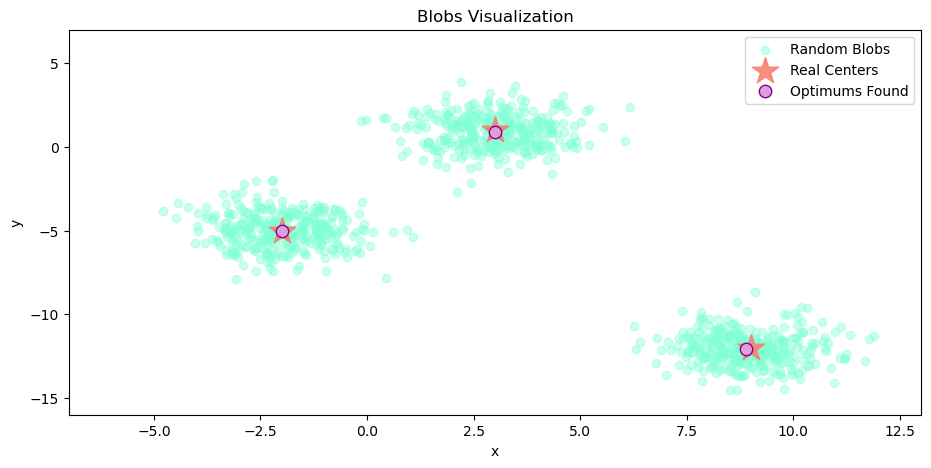

In [1136]:
plt.figure(figsize=(11,5))
plt.scatter(x_plot[0], x_plot[1], c='aquamarine', alpha=0.4)
plt.scatter(centers_transposed[0], centers_transposed[1], 
            c='salmon', marker='*', s=400, alpha=0.9)
plt.scatter(AdaGrad[0].T[0], AdaGrad[0].T[1], 
            c='plum', edgecolors='darkmagenta', s=80)
plt.title('Blobs Visualization')
plt.legend(['Random Blobs', 'Real Centers', 'Optimums Found'])
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-7, 13, -16, 7])
plt.show()

[**Go Up**](#g66)

(っ^‿^)っ(っ^‿^)っ(っ^‿^)っ